In [326]:
#EDA Titanic dataset
#url: https://www.youtube.com/watch?v=Ea_KAcdv1vs
#se explican ademas : dummie_variables y primer modelo logistic regression


In [327]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [328]:
train = pd.read_csv("titanic_train.csv")

In [329]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [330]:
train.shape

(891, 12)

In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [332]:
#looking for missing values...

In [333]:
#forma analitica...
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [334]:
# Age: 20% del total es missing: imputable
#Cabin: 77% missing: mejor eliminar columna o bien se podria reemplazar por cabin_known (1,0)
#Embarked: imputable

In [335]:
#antes: voy a poner todas las columnas en minusculas...

In [336]:
train.columns = train.columns.str.lower()


In [337]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [338]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


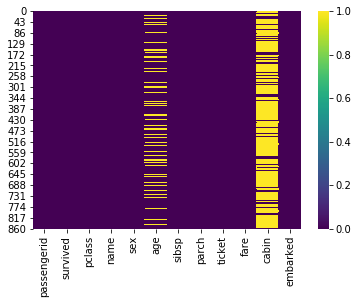

In [339]:
#opcion grafica de ver los nulls...
sns.heatmap(train.isnull(), cmap = "viridis") #cmap solo es una coloracion...

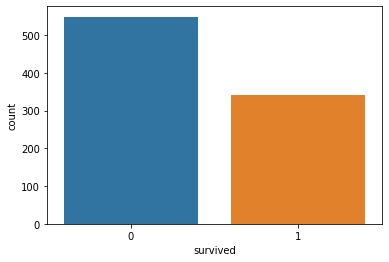

In [340]:
# analicemos la distribucion de la variable dependiente survived
#usamos countplot
sns.countplot(train["survived"])

In [341]:
train.groupby("survived").size()

survived
0    549
1    342
dtype: int64

In [342]:
#ahora visualicemos los sobrevivientes desmenuzados por sexo. hue= separados por

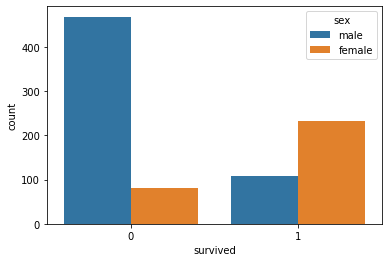

In [343]:
sns.countplot("survived", hue = "sex", data = train)

In [344]:
#una mayoritaria fraccion de fallecidos era de sexo masculino
#una mayoritaria fraccion de sobrevivientes era de sexo femenino...

In [345]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


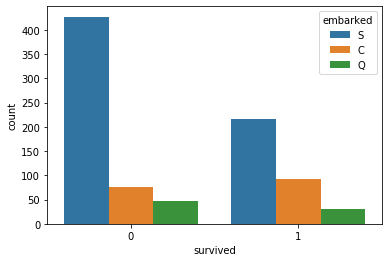

In [346]:
#tambien podemos separar por embarques
sns.countplot("survived", hue = "embarked", data = train)

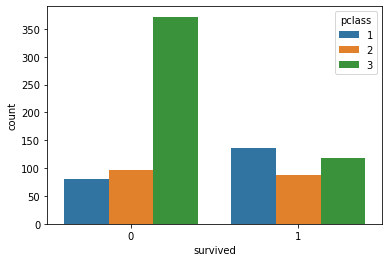

In [347]:
#o por pclass
sns.countplot("survived", hue = "pclass", data = train)

In [348]:
#los fallecidos fueron en gran proporcion pertenecientes a 3ra clase
#sobrevivientesd e 1ra clase fueron el mayor numero

In [349]:
#veamos la distribucion de la variable numerica continua age. Para eso usamos un histograma...

In [350]:
#si ploteo directamente me va a rrojar un error, porque age contiene NaNs, así que se plotea usando el dropna incluido...

Text(0.5, 1.0, 'Histograma variable continua Age')

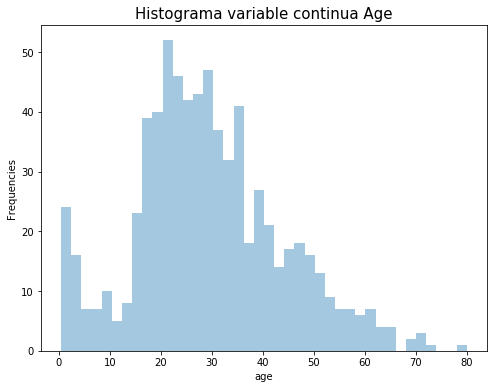

In [351]:
ax, fig = plt.subplots(figsize = (8,6))

sns.distplot(a = train["age"].dropna(), bins = 40, kde = False)
plt.ylabel("Frequencies", fontsize = 10)
plt.title("Histograma variable continua Age", fontsize = 15)

In [352]:
#podemos ver como se distribuyen las edades de la gente que viajo en general. El promedio esta entre 25 y 27 años, diria

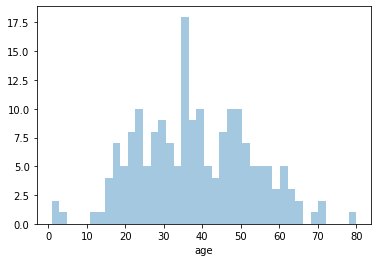

In [353]:
#tambien podemos ver por clase..
sns.distplot(a = train[train["pclass"] == 1]["age"].dropna(), kde = False, bins= 40)

In [354]:
#la gente de clase 1 tiene en rpomedio 35 años
#la de 3ra clase tuiene entre 20 y 30 años

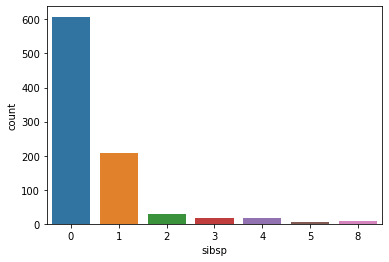

In [355]:
#veamos un countplot de siblings/spouses
sns.countplot(x ="sibsp", data = train)

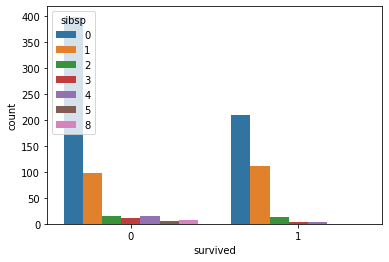

In [356]:
sns.countplot(x ="survived", hue = "sibsp", data = train)

In [357]:
#cuantos niños??'
kids = train[train["age"] < 12]

In [358]:
kids.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,436.941176,0.573529,2.632353,4.664265,1.882353,1.426471,31.834803
std,278.794788,0.498241,0.596117,3.297692,1.643889,0.554928,26.504422
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,183.750000,0.000000,2.000000,2.000000,0.750000,1.000000,19.140600
50%,433.000000,1.000000,3.000000,4.000000,1.000000,1.000000,27.825000
75%,723.750000,1.000000,3.000000,8.000000,4.000000,2.000000,31.790625
max,870.000000,1.000000,3.000000,11.000000,5.000000,2.000000,151.550000


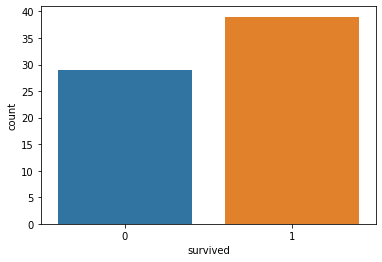

In [359]:
sns.countplot("survived", data = kids)

In [360]:
#veamos la distrubuciond de las edades de los niños fallecidos...

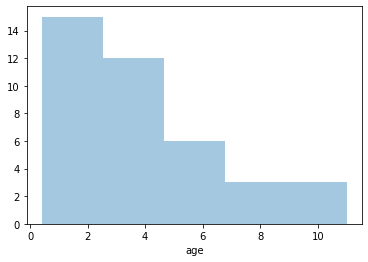

In [361]:
sns.distplot(kids[kids["survived"] == 1]["age"], kde = False )

#Data cleaning

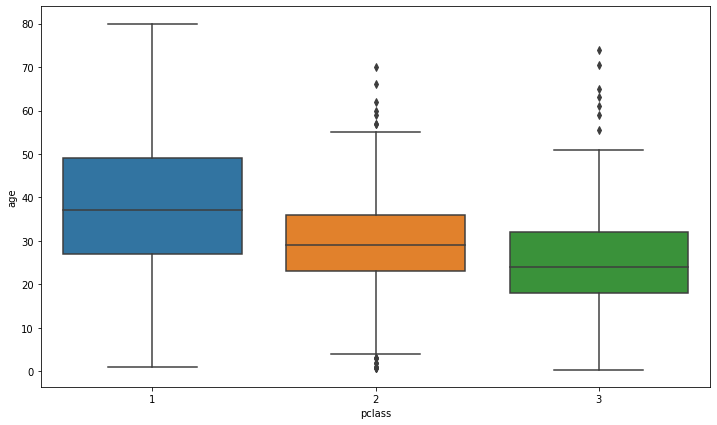

In [362]:
#otra forma de visualizar la distribucion o datos de tendencia central de las edades separadas por clases es el boxplot...
plt.figure(figsize = (12,7))
sns.boxplot(x = "pclass", y = "age", data = train)

In [363]:
train[train["pclass"] == 1]["age"].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: age, dtype: float64

In [364]:
#vamos a realizar una imputacion en el valor de age

In [365]:
#como se ve en los boxplots tenemos diferentes valores de edades promedio/modas segun la clase del pasaje
#por eso haremos una imputacion que distingue segun la clase:

def impute(cols): #cols es un arreglo con dos elementos = ["age", "pclass"]
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pd.isnull == 2:
            return 29
        else:
            return 24
    else:
        return age
    

    

In [366]:
#imputamos columna age...
train["age"] = train[["age", "pclass"]].apply(impute, axis = 1)

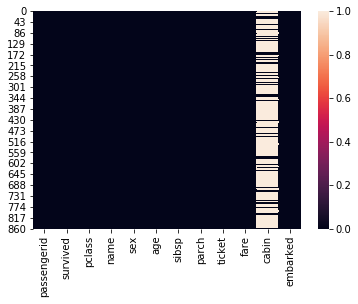

In [367]:
#ahora chequeamos los nulls...
sns.heatmap(train.isnull())

In [368]:
#ya no hay NaNs en age...

In [369]:
#nos queda cabin y embark

In [370]:
#eliminamos cabin columna...

In [371]:
train.drop("cabin", axis = 1, inplace= True)

In [372]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [373]:
#eliminemos las filas que tienen Nan en embark...

In [374]:
train.dropna(axis = 0, inplace= True)

In [375]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [376]:
train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [377]:
#para trabajar con un modelo no voy a necesitar passenger id ni name, asi que eliminos esas variables...

In [378]:
train.drop(["passengerid", "name"], axis = 1, inplace= True)

In [379]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [380]:
train.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [381]:
#work with categorical variables...

######CAPSULA DUMMIE VARIABLES###########

In [382]:
#las variables categoricas deben procesarse y darles formato numerico para poder usarlas en un modelo

In [383]:
df = pd.read_csv("http://bit.ly/kaggletrain")

In [384]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [385]:
#se usa la creacion de dummY variables


In [386]:
#metodo 1: creamos una columna nueva usando la funcion map
df["sex_map"] = df["Sex"].map({"male": 1, "female": 0})

In [387]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [388]:
#metodo 2: usar la funcion pd.get_dummies. es mas flexible que map para estas apliaciones

In [389]:
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [390]:
#get_dummies crea una columna por cada valor posible

In [391]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [392]:
pd.get_dummies(train.embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [393]:
#IMPRTANTE: CON GET_DUMMIES HAY SIEMPRE UNA COLUMNA REDUNDANTE,ASI QUE SE TRABAJA SIEMPRE CON K-1 COLUMNAS

In [394]:
#POR EJEMPO, si teniamos..

In [395]:
pd.get_dummies(df["Sex"])#con dejar male es suficiente...

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [396]:
#entonces...
pd.get_dummies(df["Sex"]).iloc[:, 1:] #saque la clumna de female

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [397]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'sex_map'],
      dtype='object')

In [398]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [399]:
#veamos con embarked

In [400]:
pd.get_dummies(df["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [401]:
#dejamos k-1 columnas
pd.get_dummies(df["Embarked"]).iloc[:, 1:]

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [402]:
#pongamos un refijo para que la columna se vea mas clara: usamos prefix
pd.get_dummies(df["Embarked"], prefix= "Embarked").iloc[:, 1:]

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [403]:
#ahora anexamos estas columnas al dataframe: usamos concat
embarcados = pd.get_dummies(df["Embarked"], prefix= "Embarked").iloc[:, 1:]
pd.concat([df, embarcados], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_map,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [404]:
#TRUCO PARA HACERLO MAS RAPIDO!
#SYNTAX: pd.get_dummies(dataframe,columns = [columnas a dummear], drop_first = True ) 
#genera el dataframe con las columnas dumeadas, las originales eliminadas y con el sistema k-1 ya aplicado

In [405]:
pd.get_dummies(df, columns= ["Sex", "Embarked"], drop_first= True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_map,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


######FIN CAPSULA#######

In [406]:
#VOLVEMOS...
train.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [407]:
#trabajemos con sex y embarked...
train = pd.get_dummies(train, columns= ["sex", "embarked"], drop_first= True)

In [408]:
#se eliminaron las columnas y se aplico el k-1

In [409]:
train.head()

,survived,pclass,age,sibsp,parch,ticket,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,35.0,0,0,373450,8.0500,1,0,1


In [410]:
#para efectos del modelo, que busca predecir si sbrivivirias, se eliminaran las columnas que no aportan

In [411]:
train.drop(["ticket"], axis = 1, inplace= True)

In [412]:
train.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [413]:
#CON ESTO YA TENEMOS LISTO MI DATASET PARA ALICARLE UN MODELO QUE PREDIGA SUPERVIVENCIA

In [414]:
train.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [415]:
#######APLICACION DEL MODELO#####
#modelo: regresion logistica (para clasificar)

In [416]:
#primero preparamos el dataset
# separamos la columna de labels (survived)
#separamos test_set del train_set
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train.drop("survived", axis = 1)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [419]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop("survived", axis = 1),
                                                   train["survived"], test_size = 0.30, 
                                                   random_state = 101) 

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
511,3,24.0,0,0,8.05,1,0,1
613,3,24.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,24.0,0,0,15.50,1,1,0
...,...,...,...,...,...,...,...,...
792,3,24.0,8,2,69.55,0,0,1
828,3,24.0,0,0,7.75,1,1,0
732,2,24.0,0,0,0.00,1,0,1
669,1,37.0,1,0,52.00,0,0,1


In [421]:
#entreno el modelo
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
predictions = log_model.predict(X_test)

In [423]:
from sklearn.metrics import confusion_matrix

In [424]:
accuracy = confusion_matrix(Y_test, predictions)

In [425]:
accuracy

array([[148,  15],
       [ 36,  68]])

In [426]:
from sklearn.metrics import accuracy_score

In [427]:
accuracy = accuracy_score(Y_test, predictions)

In [428]:
accuracy

0.8089887640449438

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])